In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop,Adam
from keras import callbacks
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from keras.models import model_from_json

In [2]:
print("resize images in the train folder")
folder ="train/clean/"
#copy_folder="images_r/train/nonwaste/"
w = int(224)
h = int(224)
for i in os.listdir(folder):
    file = f"{folder}/{i}"
    im = Image.open(file)
    im = im.resize((w, h), Image.ANTIALIAS)
    im.save(file) 
   
print("resize images in the train folder")
folder ="train/waste/"
#copy_folder="images_r/train/nonwaste/"
w = int(224)
h = int(224)
for i in os.listdir(folder):
    file = f"{folder}/{i}"
    im = Image.open(file)
    im = im.resize((w, h), Image.ANTIALIAS)
    im.save(file)
    
print("resize images in the val folder")
folder ="validation/waste/"
#copy_folder="images_r/train/nonwaste/"
w = int(224)
h = int(224)
for i in os.listdir(folder):
    file = f"{folder}/{i}"
    im = Image.open(file)
    im = im.resize((w, h), Image.ANTIALIAS)
    im.save(file)     

print("resize images in the val folder")
folder ="validation/clean/"
#copy_folder="images_r/train/nonwaste/"
w = int(224)
h = int(224)
for i in os.listdir(folder):
    file = f"{folder}/{i}"
    im = Image.open(file)
    im = im.resize((w, h), Image.ANTIALIAS)
    im.save(file)     

resize images in the train folder
resize images in the train folder
resize images in the val folder
resize images in the val folder


In [3]:

train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


In [4]:
validation = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [5]:
train_ds = train_datagen.flow_from_directory('train/',target_size=(224,224),batch_size=3,class_mode='binary')


Found 244 images belonging to 2 classes.


In [6]:
validation_ds = validation.flow_from_directory('validation/',target_size=(224,224),batch_size=3,class_mode='binary')
#test_ds = validation.flow_from_directory('validation/',target_size=(224,224),batch_size=3,class_mode='binary')

Found 51 images belonging to 2 classes.


In [7]:
train_ds.class_indices

{'clean': 0, 'waste': 1}

In [8]:
train_ds.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer = Adam(lr=0.0001),
              metrics=['accuracy']
             )

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [12]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                    mode ="min", patience = 5, 
                                       restore_best_weights = True)

In [13]:
model_fit = model.fit(train_ds,
                   epochs=20,batch_size=15,
                     validation_data=validation_ds, callbacks =[earlystopping])

Epoch 1/20
82/82 [==============================] - 18s 215ms/step - loss: 0.4431 - accuracy: 0.7951 - val_loss: 0.1599 - val_accuracy: 0.9608
Epoch 2/20
82/82 [==============================] - 18s 215ms/step - loss: 0.1194 - accuracy: 0.9631 - val_loss: 0.1155 - val_accuracy: 0.9608
Epoch 3/20
82/82 [==============================] - 18s 223ms/step - loss: 0.0797 - accuracy: 0.9672 - val_loss: 0.0771 - val_accuracy: 0.9804
Epoch 4/20
82/82 [==============================] - 17s 211ms/step - loss: 0.1446 - accuracy: 0.9385 - val_loss: 0.0982 - val_accuracy: 0.9804
Epoch 5/20
82/82 [==============================] - 17s 207ms/step - loss: 0.1701 - accuracy: 0.9221 - val_loss: 0.0265 - val_accuracy: 0.9804
Epoch 6/20
82/82 [==============================] - 17s 213ms/step - loss: 0.1177 - accuracy: 0.9713 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 7/20
82/82 [==============================] - 17s 208ms/step - loss: 0.0702 - accuracy: 0.9672 - val_loss: 0.0016 - val_accuracy: 1.0000

In [ ]:
print(model_fit.history.keys())

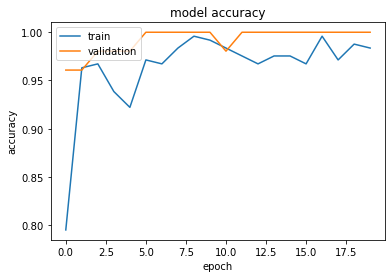

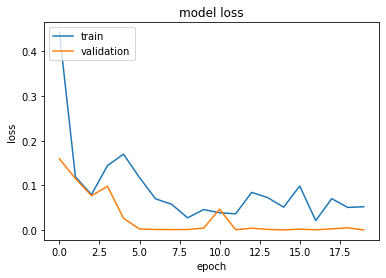

In [14]:

plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [15]:
test_generator = ImageDataGenerator()

test_ds = test_generator.flow_from_directory(directory=r"./test/",
                                                    target_size=(224, 224),
                                                    batch_size=1,
                                                    class_mode='binary', shuffle=False)

Found 64 images belonging to 2 classes.


In [ ]:
#Y_pred = model.predict_generator(test_)
#y_pred = np.where(Y_pred>0.5,1,0)
#print('Confusion Matrix')
#cm = confusion_matrix(test_.classes, y_pred)
#print(cm)
#plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [16]:
filenames = test_ds.filenames
nb_samples = len(filenames)

Y_pred = model.predict_generator(test_ds,steps=np.ceil(test_ds.samples/test_ds.batch_size),verbose=1,workers=0)
#y_pred = np.argmax(Y_pred, axis=1)
y_pred = np.where(Y_pred>0.5,1,0)
#print(y_pred)
print('Confusion Matrix')
print(confusion_matrix(test_ds.classes, y_pred))
print('Classification Report')
target_names = test_ds.classes
class_labels = list(test_ds.class_indices.keys()) 

report = classification_report(target_names, y_pred, target_names=class_labels)
print(report)

 1/64 [..............................] - ETA: 7s

C:\Users\test\AppData\Local\Temp/ipykernel_1632/192946872.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_ds,steps=np.ceil(test_ds.samples/test_ds.batch_size),verbose=1,workers=0)


64/64 [==============================] - 2s 29ms/step
Confusion Matrix
[[20  9]
 [ 5 30]]
Classification Report
              precision    recall  f1-score   support

       clean       0.80      0.69      0.74        29
       waste       0.77      0.86      0.81        35

    accuracy                           0.78        64
   macro avg       0.78      0.77      0.78        64
weighted avg       0.78      0.78      0.78        64



In [ ]:
dir_path = 'test/waste'
for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//' + i,target_size=(224,224))
  plt.imshow(img)
  plt.show()

  X=image.img_to_array(img)
  X=np.expand_dims(X,axis=0)
  images = np.vstack([X])
  val = model.predict(images)
  if val == 0:
    print("The given image is clean")
  else:
    print("The given image is waste")  

In [17]:
model_json_20_78 = model.to_json()
with open("model20_78.json", "w") as json_file:
    json_file.write(model_json_20_78)
# serialize weights to HDF5
model.save_weights("cnn20_78.h5")
print("Saved model.")

Saved model.


In [ ]:
'''
json_file = open('model32_98.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("cnn32_87.h5")
print("Loaded model")
'''

In [ ]:
#loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])